In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.
c:\users\17801\pycharmprojects\nlptt\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\17801\pycharmprojects\nlptt\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\17801\pycharmprojects\nlptt\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\17801\pycharmproject

In [2]:
#导入数据集
SELECT = 'happy'
df = pd.read_csv('弗洛伊德时间序列.csv')
# setting the index as date
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', SELECT])    #行索引是日期，列索引是“date”和所选的情绪
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data[SELECT][i] = data[SELECT][i]

new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

In [3]:
new_data

,happy
date,
2021-01-02,0
2021-01-05,0
2021-01-06,0
2021-01-07,1
2021-01-08,0
...,...
2021-04-19,NaN
2021-04-20,NaN
2021-04-21,NaN


In [4]:
dataset = new_data.values
dataset

array([[0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [3.0],
       [3.0],
       [0.0],
       [17.0],
       [0.0],
       [1.0],
       [3.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
     

In [5]:
#选定训练集和测试集
train = dataset[0:94,:]
valid = dataset[94:,:]

In [6]:
#对数据进行归一化处理
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.05882353],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05882353],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05882353],
       [0.   

In [7]:
#我们训练模型的方法是，使用每个数前面5个值来进行训练。
x_train, y_train = [], []
for i in range(5,len(train)):       #i的值从10到85
    x_train.append(scaled_data[i-5:i,0]) #将训练集切片选取i-5行到i行的第[0]列数据
    y_train.append(scaled_data[i,0])#训练集切片选取第i行第0列的那个元素
    
x_train, y_train = np.array(x_train), np.array(y_train)     #将所切得的数据转为向量矩阵型式

In [8]:
x_train.shape
#x_train.shape[0]
#x_train

(89, 5)

In [9]:
y_train.shape
#y_train

(89,)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) #将x_train矩阵重新分成80个，5行1列的矩阵
#x_train

In [11]:
#构建LSTM网络。Sequential表示顺序模型，核心操作是向其中添加layer（图层），除了LSTM，还可以添加卷积层Conv2D，最大池化层MaxPooling，
# 展平层Flatten等。
# create and fit the LSTM network
model = Sequential() # 顺序模型，核心操作是添加layer（图层）
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))  #每次输入一个多维向量，内部隐藏50个神经元
model.add(LSTM(units=50))
model.add(Dense(1)) #全连接层

model.compile(loss='mean_squared_error', optimizer='adam') #选择优化器，并指定损失函数
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 1s - loss: 0.0176


In [12]:
#我们将借助每个数据前面的5个数来预测这个数。一共预测7个数。
inputs = new_data[len(new_data) - len(valid) - 12:len(new_data) -7].values #进行切片[92-7-12:85]=[73:85]
#inputs = new_data[len(new_data) - len(valid) - 5:].values #进行切片[92-7-5:]=[80:]
#print("1",inputs)
inputs = inputs.reshape(-1,1)
#print("2",inputs)
inputs  = scaler.transform(inputs)
#print("3",inputs)

In [13]:
inputs.shape

(13, 1)

In [14]:
#X_test代表的是预测集在模型上的输入。
X_test = []
for i in range(5,inputs.shape[0]):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [15]:
X_test.shape
X_test

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.17647059],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.17647059],
        [0.        ],
        [0.17647059]],

       [[0.        ],
        [0.17647059],
        [0.        ],
        [0.17647059],
        [0.11764706]],

       [[0.17647059],
        [0.        ],
        [0.17647059],
        [0.11764706],
        [0.        ]],

       [[0.        ],
        [0.17647059],
        [0.11764706],
        [0.        ],
        [0.17647059]],

       [[0.17647059],
        [0.11764706],
        [0.        ],
        [0.17647059],
        [0.23529412]],

       [[0.11764706],
        [0.        ],
        [0.17647059],
        [0.23529412],
        [0.23529412]],

       [[0.        ],
        [0.17647059],
        [0.23529412],
        [0.23529412],
        [0.11764706]]])

In [16]:
#开始用模型预测，并将标准化后的数据转化为原始数据。
closing_price = model.predict(X_test)
print("1---",closing_price)
closing_price = scaler.inverse_transform(closing_price)
print("2---",closing_price)

1--- [[0.02441428]
 [0.02880493]
 [0.03241991]
 [0.03221057]
 [0.0318577 ]
 [0.03775118]
 [0.04088528]
 [0.04213174]]
2--- [[0.41504273]
 [0.48968384]
 [0.55113846]
 [0.5475797 ]
 [0.5415809 ]
 [0.6417701 ]
 [0.69504976]
 [0.71623963]]


In [17]:
#看一下这次的RMSE值，比之前的集中预测方法得出的值要小很多，说明误差比较小。
rmse = np.sqrt(np.mean(np.power((valid - closing_price),2)))
rmse



nan

c:\users\17801\pycharmprojects\nlptt\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<function matplotlib.pyplot.show(close=None, block=None)>

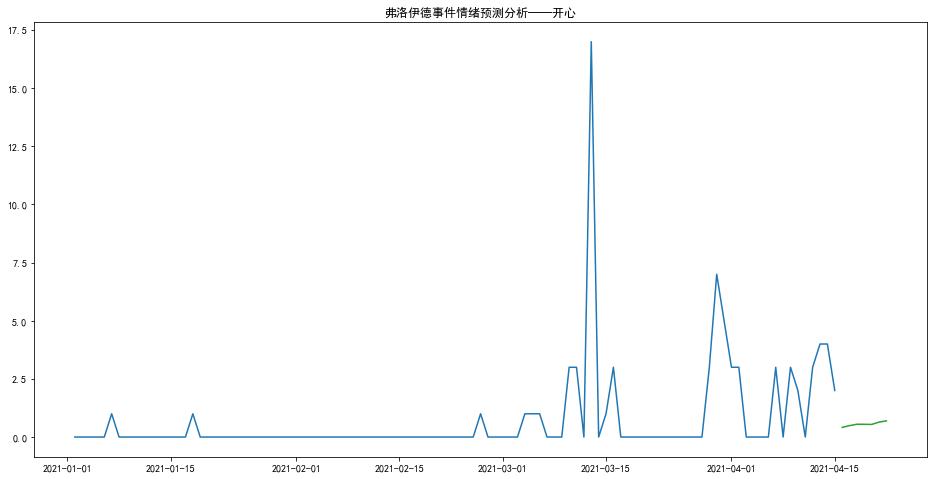

In [18]:
#通过绘图看一下预测情况。
#for plotting
train = new_data[0:94]
valid = new_data[94:]
valid['Predictions'] = closing_price
#valid['Predictions'] = closing_price
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(16,8))
plt.plot(train[SELECT])
plt.plot(valid[[SELECT,'Predictions']])
#plt.plot(valid[['Predictions']])
plt.title('弗洛伊德事件情绪预测分析——开心')
plt.show